# NDM Assignment - 1

In [1]:
# Importing the required libraries
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

Question 1

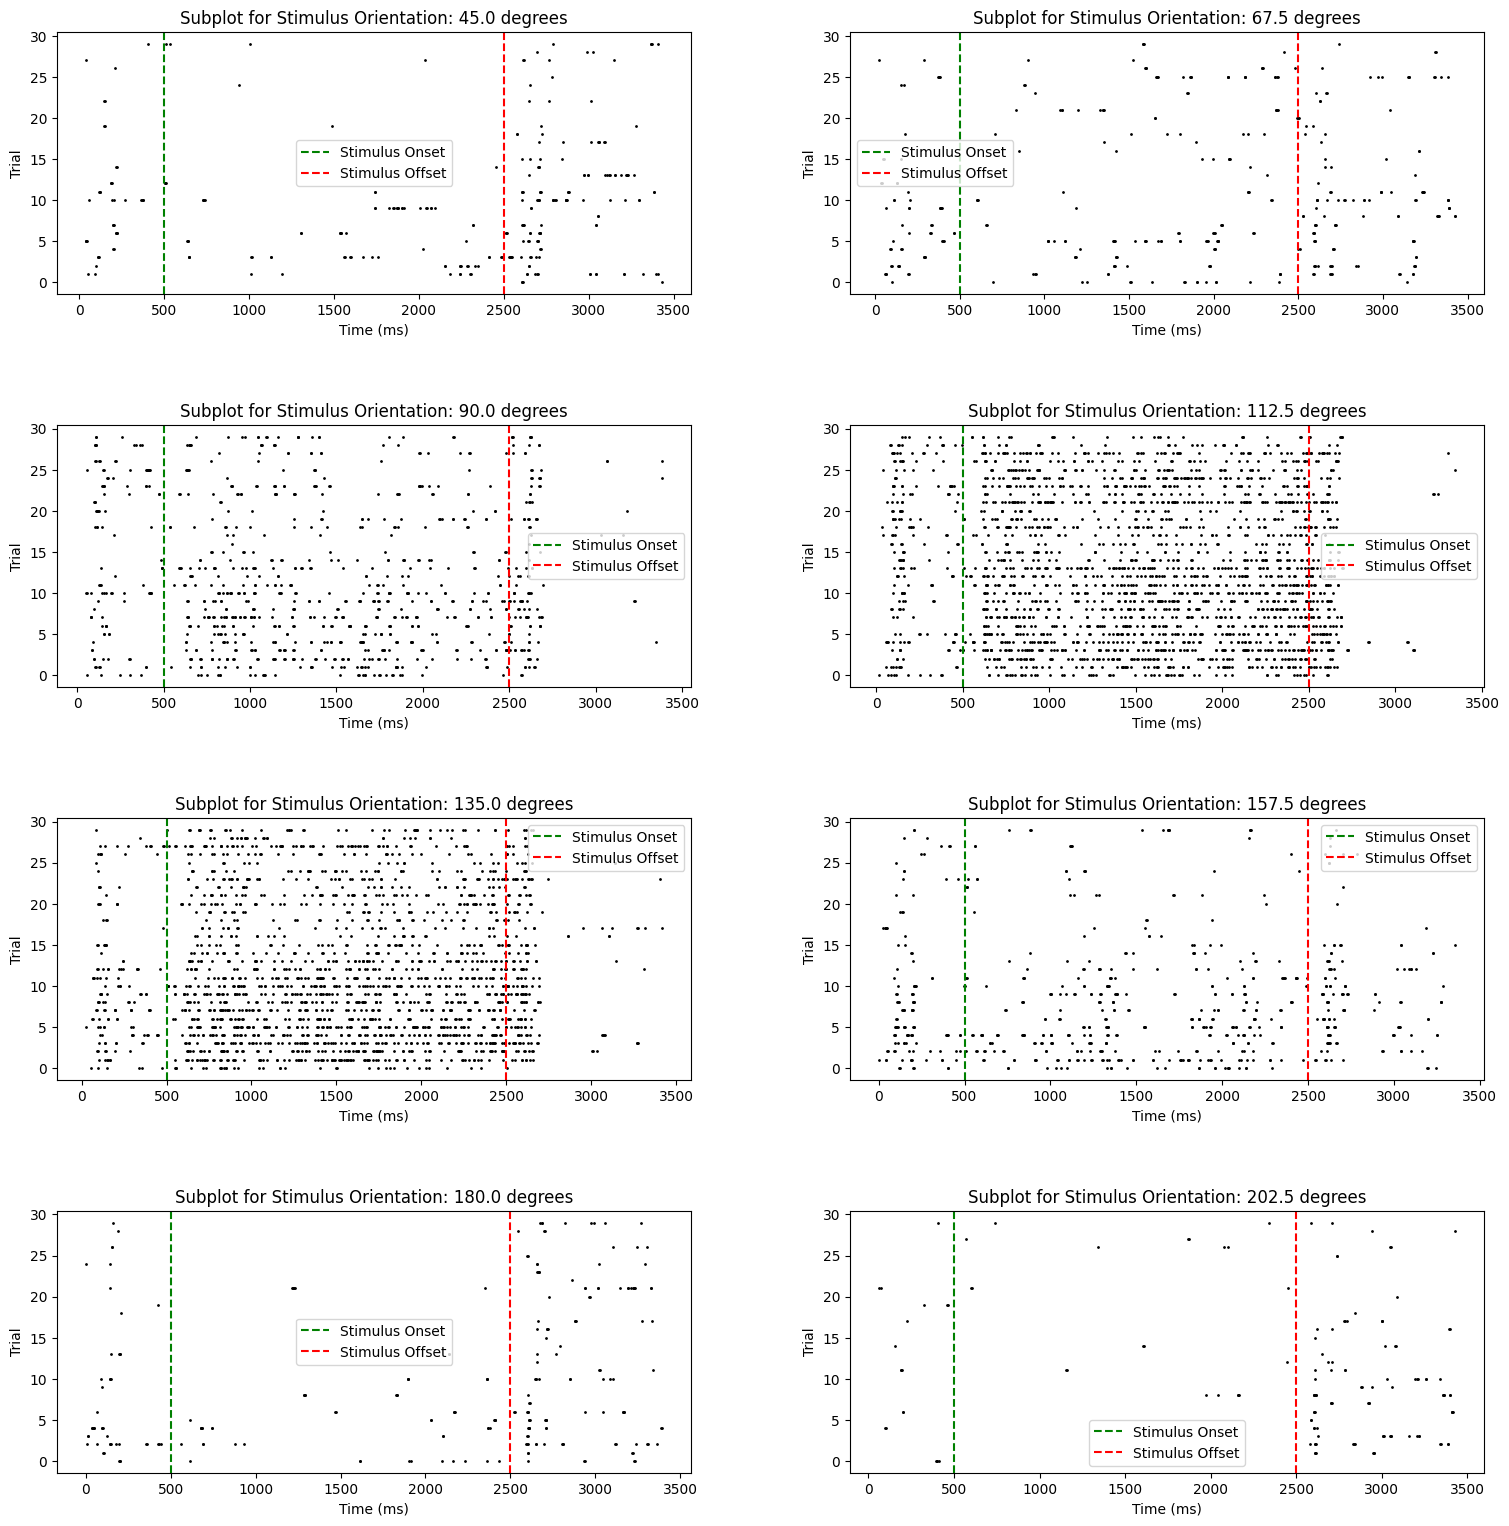

In [30]:
# Loading the MATLAB dataset `Data1_NDM.mat` into a variable called `neuron_data`. *Adding Reference Here*
neuron_data = sio.loadmat('Data1_NDM.mat')['Data1_NDM']

# Now we are calculating dimensions of our Neuron data using `shape` function from `numpy` library and storing them in variables.
num_orientations = neuron_data.shape[0]
num_time_points = neuron_data.shape[1]
num_trials = neuron_data.shape[2]

# Creating a time vector that represents the time points at which the neuron's data is recorded. It will be used to plot the spikes of the neurons over time.
time = np.arange(0, num_time_points)

# Specifiying the time at which we want to start & end observation in milliseconds.
stimulus_onset_time = 500
stimulus_offset_time = 2500  

# Here the whole figure is represented by `_` as it's not going to be used.`subplot_array` is an array of all the subplots in the figure with a shape of 4 rows and 2 columns and each subplot is of size 15 by 15 inches.
_, subplot_array = plt.subplots(4, 2, figsize=(15, 15))
_.tight_layout()

# Plotting the spikes of neurons over time for each orientation. Here `orientation_index` is iterating for each orientation.
for orientation_index in range(num_orientations):

    # Calculating row and column index for each subplot
    row,col = divmod(orientation_index, 2) 
    
    # Extracting a subset of `neuron_data` for a specific orientation
    orientation_data = neuron_data[orientation_index, :, :]
    
    for trial in range(num_trials):

        # Extracting the spike times for each trial
        spike_times = np.where(orientation_data[:, trial] == 1)[0]  

        # Plotting the spikes of neurons over time for each trial
        main_plot = subplot_array[row, col].plot(time[spike_times], trial * np.ones_like(spike_times), 'o', markersize=1, color='black') 

    # As we only have the strimulus orientation ranging from 45 to 202.5 degrees, we are calculating the orientation value for each orientation index.
    orientation_value = 45 + orientation_index * 22.5
    
    # Setting the x and y markers denoting the stimulus onset and offset time for each subplot.
    subplot_array[row, col].axvline(x=stimulus_onset_time, color='green', linestyle='--', label='Stimulus Onset')
    subplot_array[row, col].axvline(x=stimulus_offset_time, color='red', linestyle='--', label='Stimulus Offset')
    
    # Setting the subplot title to indicate stimulus orientation for each subplot.
    subplot_array[row, col].set_title(f'Subplot for Stimulus Orientation: {orientation_value} degrees')
    
    # Setting x and y axis labels & legend for each subplot.
    subplot_array[row, col].set_xlabel('Time (ms)')
    subplot_array[row, col].set_ylabel('Trial')
    subplot_array[row, col].legend()

# Adjusting spacing between subplots
plt.subplots_adjust(hspace=0.50, wspace=0.25)

# Displaying the plots
plt.show()

Question 2

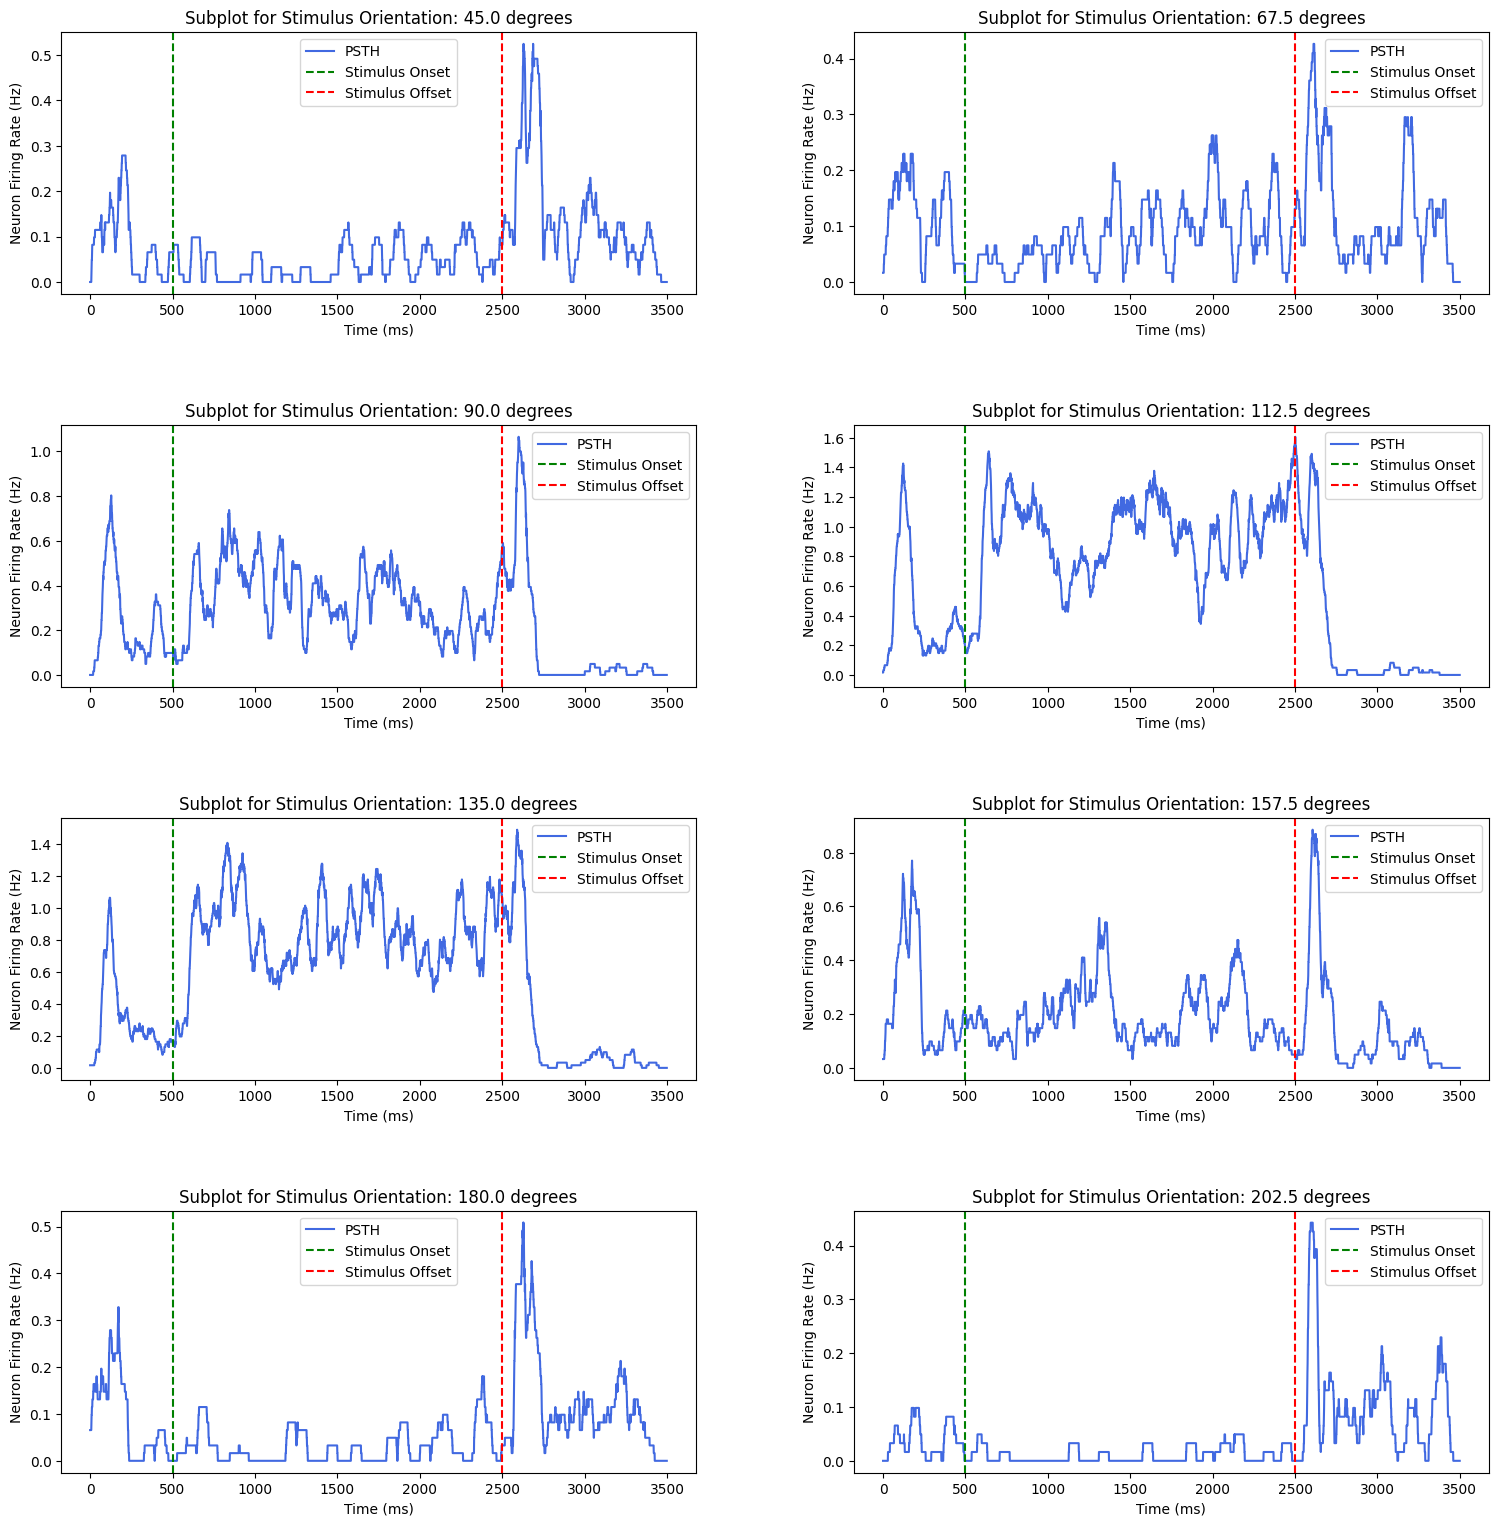

In [31]:
# Loading the MATLAB dataset `Data1_NDM.mat` into a variable called `neuron_data`. *Adding Reference Here*
neuron_data = sio.loadmat('Data1_NDM.mat')['Data1_NDM']

# Now we are calculating dimensions of our Neuron data using `shape` function from `numpy` library and storing them in variables.
num_orientations = neuron_data.shape[0]
num_time_points = neuron_data.shape[1]
num_trials = neuron_data.shape[2]

# Creating a time vector that represents the time points at which the neuron's data is recorded. It will be used to plot the spikes of the neurons over time.
time = np.arange(0, num_time_points)

# Specifiying the time at which we want to start & end observation in milliseconds.
stimulus_onset_time = 500
stimulus_offset_time = 2500

# Defining a smoothing window in milliseconds.
smoothing_window = 61

# Here the whole figure is represented by `_` as it's not going to be used.`subplot_array` is an array of all the subplots in the figure with a shape of 4 rows and 2 columns and each subplot is of size 15 by 15 inches.
_, subplot_array = plt.subplots(4, 2, figsize=(15, 15))
_.tight_layout()

# Plotting the spikes of neurons over time for each orientation. Here `orientation_index` is iterating for each orientation.
for orientation_index in range(num_orientations):

    # Calculating row and column index for each subplot
    row,col = divmod(orientation_index, 2) 
    
    # Extracting a subset of `neuron_data` for a specific orientation
    orientation_data = neuron_data[orientation_index, :, :]

    # Smoothing the data using a moving average method and convolving it with `smoothing_window`.
    smoothed_data = np.convolve(np.sum(orientation_data, axis=1), np.ones(smoothing_window), 'same') / smoothing_window

    # Plotting the Peri-Stimulus Time Histogram (PSTH) for each orientation using the smoothed data.
    subplot_array[row, col].plot(time, smoothed_data, color='royalblue', label='PSTH')

    # As we only have the strimulus orientation ranging from 45 to 202.5 degrees, we are calculating the orientation value for each orientation index.
    orientation_value = 45 + orientation_index * 22.5
    
    # Setting the x and y markers denoting the stimulus onset and offset time for each subplot.
    subplot_array[row, col].axvline(x=stimulus_onset_time, color='green', linestyle='--', label='Stimulus Onset')
    subplot_array[row, col].axvline(x=stimulus_offset_time, color='red', linestyle='--', label='Stimulus Offset')
    
    # Setting the subplot title to indicate stimulus orientation for each subplot.
    subplot_array[row, col].set_title(f'Subplot for Stimulus Orientation: {orientation_value} degrees')
    
    # Setting x and y axis labels & legend for each subplot.
    subplot_array[row, col].set_xlabel('Time (ms)')
    subplot_array[row, col].set_ylabel('Neuron Firing Rate (Hz)')
    subplot_array[row, col].legend()

# Adjusting spacing between subplots
plt.subplots_adjust(hspace=0.50, wspace=0.25)

# Displaying the plots
plt.show()

Question 3

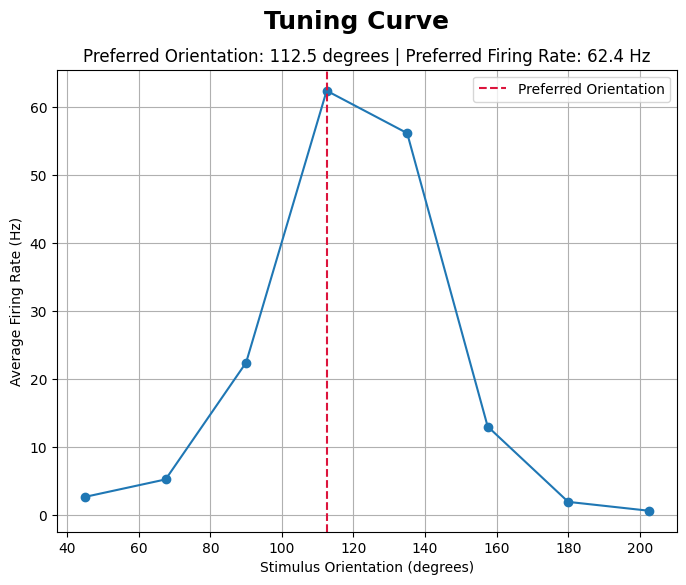

The preferred orientation of the neuron is 112.5 degrees.
The average firing rate at the preferred orientation is 62.4 Hz.


In [65]:
# Loading the MATLAB dataset `Data1_NDM.mat` into a variable called `neuron_data`. *Adding Reference Here*
neuron_data = sio.loadmat('Data1_NDM.mat')['Data1_NDM']

# Now we are calculating dimensions of our Neuron data using `shape` function from `numpy` library and storing them in variables.
num_orientations = neuron_data.shape[0]
num_time_points = neuron_data.shape[1]
num_trials = neuron_data.shape[2]

# Creating a time vector that represents the time points at which the neuron's data is recorded. It will be used to plot the spikes of the neurons over time.
time = np.arange(0, num_time_points)

# Specifiying the time at which we want to start & end observation in milliseconds.
stimulus_onset_time = 500
stimulus_offset_time = 2500

# Creating an array of zeros to store the firing rates of each neuron for each orientation.
firing_rate_array = np.zeros(num_orientations)

# Creating a list of all the orientations ranging from 45 to 202.5 degrees.
orientations = np.arange(45, 203, 22.5)

for orientation_index in range(num_orientations):

    # Selecting neuronal data for the current orientation
    orientation_data = neuron_data[orientation_index, :, :]

    # Returing a boolean array with `True` values for time points between stimulus onset and offset time.
    time_window_bool = (time >= stimulus_onset_time) & (time <= stimulus_offset_time)
    
    # Calculating the average firing rate for this orientation
    firing_rate = np.mean(np.sum(orientation_data[time_window_bool, :], axis=0))
    
    # Store the firing rate
    firing_rate_array[orientation_index] = firing_rate

# Calculating the preferred orientation by finding the index of the maximum firing rate along the orientation axis.
preferred_orientation = orientations[np.argmax(firing_rate_array)]

# Calculating the preferred firing rate by finding the maximum firing rate along the orientation axis.
preferred_firing_rate = firing_rate_array[np.argmax(firing_rate_array)]

# Plotting the tuning curve
plt.figure(figsize=(8, 6))
plt.plot(orientations, firing_rate_array, marker='o', linestyle='-')
plt.title(f'Preferred Orientation: {preferred_orientation} degrees | Preferred Firing Rate: {preferred_firing_rate} Hz')
plt.suptitle(f'Tuning Curve', fontsize=18 , fontweight='semibold')
plt.xlabel('Stimulus Orientation (degrees)')
plt.ylabel('Average Firing Rate (Hz)') 
plt.grid(True)

# Marking the preferred orientation with a vertical dashed line
plt.axvline(x=preferred_orientation, color='crimson', linestyle='--', label='Preferred Orientation')
plt.legend()

# Displaying the tuning curve plot
plt.show()

# Printing the preferred orientation of the neuron in degrees.
print(f"The preferred orientation of the neuron is {preferred_orientation} degrees.")

# Printing the average firing rate of the neuron at the preferred orientation in Hz.
print(f"The average firing rate at the preferred orientation is {preferred_firing_rate} Hz.")
